## Random Forests

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Decision Tree model from SKLearn
from sklearn.ensemble import RandomForestClassifier

#Provides a way to split the data into train and test data sets.
from sklearn.model_selection import train_test_split 

#Provides a way to calculate metrics on the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,  roc_auc_score

In [129]:
def plot_cm(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

## Classification Measures

Precision
$$ p=\frac{tp}{tp+fp} $$

Recall
$$ r=\frac{tp}{tp+fn} $$

$$ F_{1} Score = 2 \times \frac{p \times r}{p + r} $$

In [158]:
long_census = pd.read_csv('adult_census/final_data_set.csv')
#long_census = pd.read_csv('adult_census/balanced.csv')

In [159]:
len(long_census)

32561

In [160]:
X = long_census.iloc[:,5:107]
y = long_census['salary']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

In [162]:
y_train.shape

(26048,)

In [171]:
clf = RandomForestClassifier(n_estimators=250,
                            criterion='entropy')
clf.fit(X_train,np.ravel(y_train))

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [172]:
y_pred = clf.predict(X_test)

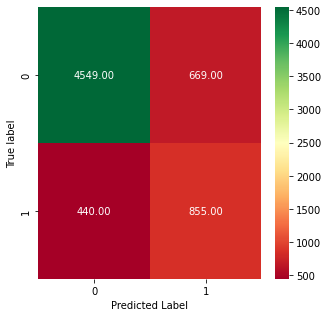

In [173]:
plot_cm(y_pred, y_test)

In [174]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5218
           1       0.56      0.66      0.61      1295

    accuracy                           0.83      6513
   macro avg       0.74      0.77      0.75      6513
weighted avg       0.84      0.83      0.83      6513



## LandSat Data

In [52]:
land_train = pd.read_csv('landsat_train.csv')
land_test = pd.read_csv('landsat_test.csv')

In [53]:
X_train = land_train.iloc[:,0:36]
y_train = land_train.iloc[:,36:37]

X_test = land_test.iloc[:,0:36]
y_test = land_test.iloc[:,36:37]

In [62]:
np.ravel(y_train).shape

(4435,)

In [63]:
clf = RandomForestClassifier(criterion='entropy',
                            max_features=3)
clf.fit(X_train,np.ravel(y_train))

RandomForestClassifier(criterion='entropy', max_features=3)

In [64]:
y_pred = clf.predict(X_test)

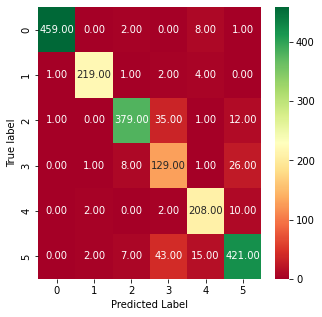

In [65]:
plot_cm(y_pred, y_test)

In [66]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       470
           2       0.98      0.96      0.97       227
           3       0.95      0.89      0.92       428
           4       0.61      0.78      0.69       165
           5       0.88      0.94      0.91       222
           7       0.90      0.86      0.88       488

    accuracy                           0.91      2000
   macro avg       0.89      0.90      0.89      2000
weighted avg       0.92      0.91      0.91      2000

